<a href="https://colab.research.google.com/github/YashashGaurav/hotel-customer-churn-modeling/blob/main/final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Video link for the presentation: https://youtu.be/8nnSJDKhiQY



# **Problem Domain and Project Goals**

**Since the COVID-19 pandemic, free cancellation policy has become a common policy offered by most of the hotels in the U.S. to attract customers, since concerning the uncertain situations customers demand for more flexibility for their bookings [[eventtemple]](https://www.eventtemple.com/hotel-operations/hotel-cancellation-rates-a-thing-of-the-past/). Even though the COVID-19 situation is getting better, this policy is not likely to be cancelled, as hotels may be aware of losing their customers, considering that their competitors still maintain this policy. The research shows that the bookings cancellation rates in 2022 has reached 20%, which is a 33% increase from 2019 [[revenue-hub]](https://revenue-hub.com/three-most-common-trends-impacting-cancellation-rates/). The increase in cancellations does not only impact the hotel’s revenue, but also has an adverse impact on hotel’s marketing channels, since Online Travel Agencies keep track of cancellations of the hotel [[hotelminder]](https://www.hotelminder.com/everything-you-need-to-know-about-hotel-cancellations).**

**Given these facts, the goal of this project is to find solutions to help hotels reducing the number of cancellations. To achieve that goal, we will use machine learning techniques, specifically classification techniques, to determine which customers are likely to cancel their bookings, based on customers’ booking information, such as booking date, the length of stay, number of people, types of a deposit, and special requests. Knowing the probability of cancellation of each reservation, the hotels will be able to tackle this problem with various solutions. For instance, they will be able to target the customers that are prone to cancel their reservations and offer an additional promotion to make them reconsider their decisions. Moreover, the hotels will have a better approximation on how many staffs and hotel essential amenities they will need on specific date or month. Therefore, they will be able to minimize their costs and increase revenue. In addition to being able to identify the customers that are likely to cancel their bookings, the machine learning techniques will enable hotels to identify the leading factors that cause cancellations, which in turn will give hotels an insight of which areas they should improve to make them become successful hotels.**


**Considering the goal of this project, the task (`T`), performance (`P`), and experience (`E`) are as follows:**


**- `Task` is to identify the probability of cancellation of a reservation. Alternatively, we would like to know which customer is likely to cancel his/her reservation.**


**- `Performance` of this task is how precisely the hotels can point out the customers that are likely to cancel their reservations. More specifically, hotels want to correctly target the customers that tend to make cancellations, and do not want to miss any customer that they can reach out to convince them to not make cancellations.**



**- `Experience` is the historical data of the hotel reservations that will allow the hotels to more confidently identify which customers tend to cancel their reservations, using the machine learning techniques.**

# **Dataset**

**The Hotel Booking Demand dataset provides historical information related to hotel reservations, such as types of hotel, the date that the reservation was made, the number of children, the number of adults, the length of stays, the number of required parking spaces, and the number of special requests. It consists of one table with 32 columns and 119,390 rows. It can be downloaded as a CSV file at the following link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv.**

# **Methods of Analysis**

**We builds various classification models for our analysis, including Logistic Regression, K Nearest Neighbor, Decision Tree, Random Forest, XGBoost, and Artificial Neural Network. The target variable is 'is-cancelled', which indicates whether the reservtion was cancelled - 0 for not cancelled and 1 for cancelled. Our analysis consists of three majors steps - Data Preprocessing, Modelling, and Model Evaluation. The details for each are described in the following sections.**

## **1. Data Preprocessing and EDA**

**Some of the necessary packages for this analysis are downloaded.**

In [ ]:
try:
    import scikeras
except ImportError:
    ! pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import pickle
from typing import Dict, Iterable, List, Any


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt

**We download the dataset from the 'hotel_bookings.csv' file and store it in a dataframe. The description of each columns can be found [here](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). Then we look at the overall information of the dataset, such as number of rows, number of columns, features, and data types.**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# read data and store in DataFrame
df = pd.read_csv("hotel_bookings.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**In the first step, we go through the data dictionary to understand what each column means and find that there is some information that should not be available at the time of prediction. Hence, we drop those columns, which include:**

**1. assigned_room_type: type of the room assigned to customer once the booking had been confirmed.<br>2. booking_changes: number of changes made to booking from the moment the booking was entered on the system until the moment of check-in or cancellation.<br>3. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer<br>4. reservation_status: the last status of the reservation<br>5. reservation_status_date: the date that the last status of the reservation was set**

In [ ]:
# We should not include the data that is not available at the time of 
# prediction. Hence, we drop some of the columns.
# 1. assigned_room_type:        type of the room assigned to customer once the
#                               booking had been confirmed.
# 2. booking_changes:           number of changes made to booking from the 
#                               moment the booking was entered on the system
#                               until the moment of check-in or cancellation.
# 3. days_in_waiting_list:      Number of days the booking was in the waiting 
#                               list before it was confirmed to the customer
# 4. reservation_status:        the last status of the reservation
# 5. reservation_status_date:   the date that the last status of the
#                               reservation was set

df = df.drop(columns={
    'assigned_room_type', 
    'booking_changes',
    'days_in_waiting_list', 
    'reservation_status', 
    'reservation_status_date'
})

**We also drop agent column and company column, as these two columns indicate the numerical id of the agent and company and that information is not useful for our analysis.**

In [ ]:
# We also drop the columns that are not useful for our analysis
# 1. agent:     the numerical ID of the agaent
# 2. company:   the numerical ID of the company

df = df.drop(columns={'agent', 'company'})

**We check how many columns we have left after dropping some columns and also look for null values in each columns. We find that we have null values only in country column. However, the number of null values in this columns is only 0.53% of the total number of rows. Thus, we decide to drop all those rows with null values.**

In [ ]:
# check duplicated rows
df.duplicated().sum()

34091

In [ ]:
# drop duplicates
df = df.drop_duplicates()

In [ ]:
# check for null values after dropping unneeded columns and duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85299 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85299 non-null  object 
 1   is_canceled                     85299 non-null  int64  
 2   lead_time                       85299 non-null  int64  
 3   arrival_date_year               85299 non-null  int64  
 4   arrival_date_month              85299 non-null  object 
 5   arrival_date_week_number        85299 non-null  int64  
 6   arrival_date_day_of_month       85299 non-null  int64  
 7   stays_in_weekend_nights         85299 non-null  int64  
 8   stays_in_week_nights            85299 non-null  int64  
 9   adults                          85299 non-null  int64  
 10  children                        85295 non-null  float64
 11  babies                          85299 non-null  int64  
 12  meal                           

In [ ]:
# we notice that only the 'country' column has null fields
# so check percentage of null values in country column
df.isnull().sum()['country']*100/len(df)

0.527556008862941

In [ ]:
# only 0.5% of rows have null values in country column 
# so we decide to drop these rows
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84845 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84845 non-null  object 
 1   is_canceled                     84845 non-null  int64  
 2   lead_time                       84845 non-null  int64  
 3   arrival_date_year               84845 non-null  int64  
 4   arrival_date_month              84845 non-null  object 
 5   arrival_date_week_number        84845 non-null  int64  
 6   arrival_date_day_of_month       84845 non-null  int64  
 7   stays_in_weekend_nights         84845 non-null  int64  
 8   stays_in_week_nights            84845 non-null  int64  
 9   adults                          84845 non-null  int64  
 10  children                        84845 non-null  float64
 11  babies                          84845 non-null  int64  
 12  meal                           

**After that, we move on to feature engineering and feature selection steps. We creates a new feature from three existing columns - arrival_date_year, arrival_date_month, and arrival_date_day_of_month columns. These columns combined indicate the arrival date of the customer. The new feature that we create is arrival_days_diff, which represents the date difference between January 1 of that year and arrival date. For instance, if the original arrival date is on January 15, 2017, the value of the new feature will be 14 (the date difference between January 1, 2017 and January 15, 2017). The resson that we comes up with this new feature is that it seems more effective to use this one feature than separated three features, since they indicate the same thing. More importantly, this also help to reduce number of categorical features, which we need to perform One-Hot-Encoding on in the later steps.**

In [ ]:
# covert data types of arrival_date_month (str) to numerical month (int) 
df['arrival_date_month'] = pd.to_datetime(
        df['arrival_date_month'], format='%B'
    ).dt.month

# create new column representing arrival yyyy-mm-dd 
df = df.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month', 
                        'arrival_date_day_of_month':'day'})
df['arrival_ymd'] = pd.to_datetime(df[["year", "month", "day"]])

In [ ]:
# create new feature representing the date difference between January 1 of that year and arrival date
df['arrival_days_diff'] = (
        df['arrival_ymd'] - pd.to_datetime(df['year'], format='%Y')
    ).dt.days

In [ ]:
# drop year, month, day, arrival_date_week_number, arrival_ymd columns
df = df.drop(columns={
        "year", 
        "month", 
        "day", 
        "arrival_date_week_number", 
        "arrival_ymd"
    })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84845 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84845 non-null  object 
 1   is_canceled                     84845 non-null  int64  
 2   lead_time                       84845 non-null  int64  
 3   stays_in_weekend_nights         84845 non-null  int64  
 4   stays_in_week_nights            84845 non-null  int64  
 5   adults                          84845 non-null  int64  
 6   children                        84845 non-null  float64
 7   babies                          84845 non-null  int64  
 8   meal                            84845 non-null  object 
 9   country                         84845 non-null  object 
 10  market_segment                  84845 non-null  object 
 11  distribution_channel            84845 non-null  object 
 12  is_repeated_guest              

**We divide the features into three categories: continuous feature, categorical feature, and binary feature.**

In [ ]:
# define numerical and categorical features (target variable: is_canceled)
continuous_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                       'adults', 'children','babies','previous_cancellations', 
                       'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces', 
                       'total_of_special_requests', 'arrival_days_diff']

cat_features = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
               'deposit_type', 'customer_type']

binary_features = ['is_repeated_guest']
len(continuous_features) + len(cat_features) + len(binary_features)

21

**For the categorical features, we check the distinct values in each columns and then find that some columns have a value that solely exists in one row of the whole dataset. Meanwhile, some columns have hugh number of distinct values. We need to concern about these, since we need to perform One-Hot-Encoding on those features. Therefore, we make some changes to those values.**

In [ ]:
def distinct_cat(df, col_names):
    '''
    takes dataframe and column names as inputs
    print distinct values in those categorical
    feature columns.
    '''
    for i in col_names:
        print(df[i].value_counts())
        print()

In [ ]:
distinct_cat(df, cat_features)

City Hotel      52074
Resort Hotel    32771
Name: hotel, dtype: int64

BB           66066
SC            9397
HB            8624
Undefined      420
FB             338
Name: meal, dtype: int64

PRT    26605
GBR    10180
FRA     8648
ESP     7119
DEU     5223
       ...  
MMR        1
CYM        1
BFA        1
NAM        1
KHM        1
Name: country, Length: 177, dtype: int64

Online TA        51123
Offline TA/TO    13258
Direct           11528
Groups            4143
Corporate         3883
Complementary      686
Aviation           224
Name: market_segment, dtype: int64

TA/TO        67432
Direct       12586
Corporate     4649
GDS            177
Undefined        1
Name: distribution_channel, dtype: int64

A    54359
D    17197
E     5958
F     2810
G     2033
B      976
C      909
H      596
L        6
P        1
Name: reserved_room_type, dtype: int64

No Deposit    83766
Non Refund      990
Refundable       89
Name: deposit_type, dtype: int64

Transient          70968
Transient-Party    1

**According to the data dictionary, both 'SC' and 'Undefined' values in meal column indicate no meal package, and thus we replace all 'Undefined' with 'SC'.**

In [ ]:
# for meal column, 'SC' and 'Undefined' both indicate no meal package.
# as indicated in the documentation of the dataset.
df.loc[df['meal'] == 'Undefined', 'meal']  = 'SC'

In [ ]:
df['meal'].value_counts()

BB    66066
SC     9817
HB     8624
FB      338
Name: meal, dtype: int64

**For distribution_channel column, we find that there is only 1 row that has 'Undefined' value. That is not desirable, because we do not want to have a One-Hot-Encoding feature that represents only 1 row of the whole dataset. To deal with this value, we check for this reservation's market_segment and find that it is a direct market section, and hence we assume that its distribution channel is likely to be direct distribution channel as well. We then assign 'Direct' value to the distribution channel column.**

**It is noted that reserved_room_type columm also has this issue; however, the values of reserved_room_type are encoded. We cannot interpret those values, and thus we cannot modify values in this column.**

In [ ]:
# there is only one row that has 'Undefined' distribution channel
df[df['distribution_channel'] == 'Undefined']['market_segment']

14594    Direct
Name: market_segment, dtype: object

In [ ]:
# it has direct market segment, so we assign 'Direct' as distribution_channel.
# TODO:
df.loc[df['distribution_channel'] == 'Undefined', 'distribution_channel'] = 'Direct'

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        67432
Direct       12587
Corporate     4649
GDS            177
Name: distribution_channel, dtype: int64

**For country column, it has 177 dictinct values. This will create 177 new features when we do the One-Hot-Encoding. We notice that it can be a problem when we train model using that many features. However, this feature seems to have important information for classifying whether the reservation will be cancelled. As a result, we will do the experiments on this columns by training a model with varied the number of distinct values in this columns and use the training results to decide how many distinct values we should keep.**

**After dealing with the categorical features, we look for the rows that are likely to be incorrect data. For example, some rows have the toal number of persons as zero. Some have the total number of stays as zero. We exclude those rows from our analysis.**

In [ ]:
# check for rows that have number of persons or number of stays equal to zeroes, 
# as they're likely to be incorrect data
df = df[(df['adults'] + df['children'] + df['babies']) != 0]
df = df[(df['stays_in_weekend_nights'] + df['stays_in_week_nights']) != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84110 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           84110 non-null  object 
 1   is_canceled                     84110 non-null  int64  
 2   lead_time                       84110 non-null  int64  
 3   stays_in_weekend_nights         84110 non-null  int64  
 4   stays_in_week_nights            84110 non-null  int64  
 5   adults                          84110 non-null  int64  
 6   children                        84110 non-null  float64
 7   babies                          84110 non-null  int64  
 8   meal                            84110 non-null  object 
 9   country                         84110 non-null  object 
 10  market_segment                  84110 non-null  object 
 11  distribution_channel            84110 non-null  object 
 12  is_repeated_guest              

**In this step, we check for the class imbalance. We find that we have 72% of data with class 0 (not cancelled) and only 28% of data with class 1 (cancelled). Our data is quite imbalanced. We need to account for this issue in the modeling part.**

In [ ]:
# check for class imbalance # TODO: check

df_plot_1 = df.groupby('is_canceled').agg('count').\
            reset_index()[['is_canceled','hotel']].\
            rename(columns={'hotel':'count'})
df_plot_1.loc[df_plot_1.is_canceled == 0, 'is_canceled'] = 'Class 0 (not cancelled)'
df_plot_1.loc[df_plot_1.is_canceled == 1, 'is_canceled'] = 'Class 1 (cancelled)'
df_plot_1['perc'] = df_plot_1['count']/df_plot_1['count'].sum()

chart = alt.Chart(df_plot_1).mark_bar().encode(
    x='is_canceled:N',
    y='count:Q'
).properties(
    width=400,
    height=300
)

text = chart.mark_text(
    baseline='line-bottom',
).encode(
    text=alt.Text('perc:Q', format='.2%')
)

chart + text

alt.LayerChart(...)

**We also check for distribution of the continuous features and find that we have different scales of values in each columns. Hence, we need to deal with this in the modeling part.**

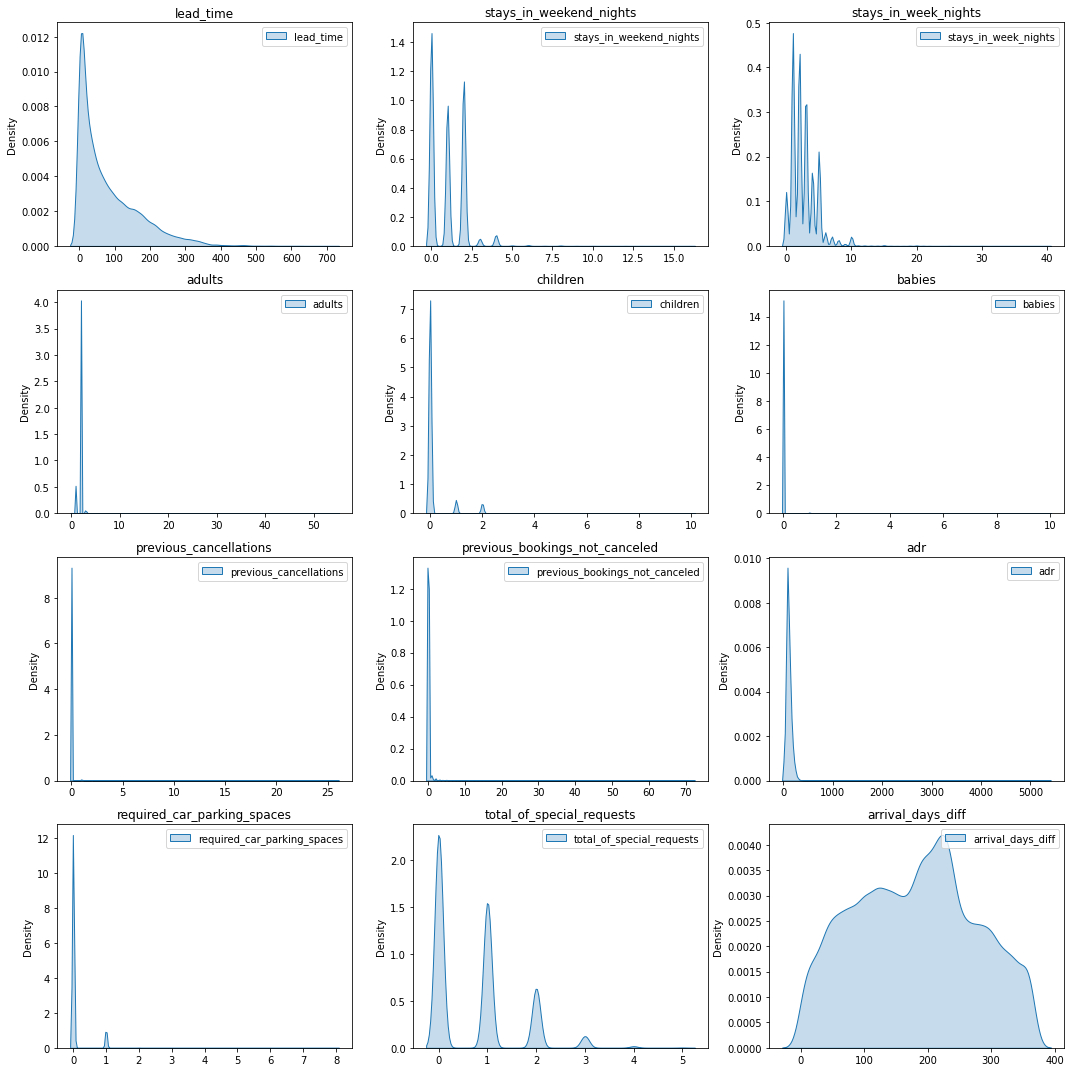

In [ ]:
# check data distribution for continuous variables

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.ravel()
 
for col, ax in zip(continuous_features, axes):
    data = df[[col]]  # select the data
    sns.kdeplot(data=data, shade=True, ax=ax)
    ax.set(title=col, xlabel=None)
    
fig.tight_layout()
plt.show()

**Multicorrelation between features can be an issue in terms of the model performance and model interpretation. Therefore, we check for the multicorrelation using variance inflation factor (VIF). The abmormally high value of the absolute value of VIF of a feature indicates multicorrelation of that feature with some other features. From the results, we do not find any features that have high VIF value, and thus there is not multicorrelation and we do not need to drop any features.**

In [ ]:
# check for multicorrelation between features using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [(continuous_features[i],variance_inflation_factor(df[continuous_features].values, i)) 
       for i in range(len(continuous_features))]
vif

[('lead_time', 2.168924340134457),
 ('stays_in_weekend_nights', 2.844784217328904),
 ('stays_in_week_nights', 3.951255614939119),
 ('adults', 6.937167795290816),
 ('children', 1.234779708339504),
 ('babies', 1.0197028894270002),
 ('previous_cancellations', 1.1973814229453232),
 ('previous_bookings_not_canceled', 1.2076379927696554),
 ('adr', 5.576779762612658),
 ('required_car_parking_spaces', 1.1031955833303788),
 ('total_of_special_requests', 1.7834346171402922),
 ('arrival_days_diff', 3.981192762007278)]

**In the last step of data preprocessing, we check for the outlier values in each columns. We use the interquartile range (IQR) to detect the outliers. The values that are less than or equal to Q1 - 1.5IQR and those that are higher than or equal to Q3 + 1.5IQR will be considered outliers. We assign null values to those outliers, so that we can check for number of outliers by summing up all null values in each columns. Using this method, we find that there is no outlier in our dataset.** 

In [ ]:
# check for outliers
def detect_outlier(col):
    '''
    takes a pandas series as an input 
    finds the outliers in that columns
    for the outlier, it will assign np.nan
    return a numpy array with outliers 
    replaced with np.nan
    '''
    data = col.values
    # calculate the q25, q75, and IQR
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # identify outliers
    outliers_removed = [x if x >= lower or x <= upper else np.nan for x in data]
    return outliers_removed

In [ ]:
df[continuous_features] = df[continuous_features].apply(lambda s : detect_outlier(s))

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
arrival_days_diff                 0
dtype: int64

## **2. Modeling** - Ablations and model selection

**In this section, we will train 6 classification models, including Logistic Regression, K Nearest Neighbor, Decision Tree, Random Forest, XGBoost, and Artificial Neural Network. The score that we use to select the best model is F2-Score. We will describe more about the reason that we choose this score in this section below.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler, StandardScaler
)

from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, GridSearchCV
)

from sklearn.metrics import (
    precision_recall_curve, f1_score, fbeta_score, 
    make_scorer, accuracy_score, confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings("ignore")

**We divide the features into 2 types - numerical feature and categorical feature - so that we can create approprate preprocessing pipeline. We will perform One-Hot-Encoding on the categorical data and scale the numerical features using StandardScaler.**

In [ ]:
# separate the columns name between numerical columns and categorical columns
cat_columns = cat_features
num_columns = continuous_features + binary_features

In [ ]:
# define ColumnTransformer to preprocess the data
ohe = OneHotEncoder(handle_unknown="ignore", drop='first')
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ("continuous", scaler, continuous_features),
    ("categorical", ohe, cat_columns)]
)

**As we discussed above, we have 177 distinct values in country columns. Ideally we would want to club less frequent categories into an 'other' category to save our selfs from creating too many features while OHEing this variable for training. But we want to test by retaining how much of this information would actually aid in our classification task.**

**Thus, in this section we create 4 different dataset with varied number of distinct values in country column:**<br>

**1.keep all distinct values**<br>
**2.keep top 100 countries that have the largest number of rows and assgined 'other' value to the rest**<br>
**3.keep top 50 countries that have the largest number of rows and assgined 'other' value to the rest**<br>
**4.keep top 10 countries that have the largest number of rows and assgined 'other' value to the rest**<br>

**We then train a Logistic Regression model on all these dataset to see if different number of distinct values will significantly affect the model performance.** 

In [ ]:
# bin country column with different number of distinct values we want to keep

def bin_country(country, top_countries):
    '''
    takes string of country as an input and list of
    top countries that the user want to keep
    checks if it is one of top n countries that customers come from
    if it is, return the original country, otherwise 'other'. 
    '''
    if country not in top_countries:
        return 'other'
    else:
        return country

In [ ]:
# keep all distinct values
df1 = df.copy()

# keep top 100 countries that have the largest number of rows and assgined 
# 'other' value to the rest
top_100_countries = df['country'].value_counts()[:100].index.tolist()
df2 = df.copy()
df2['country'] = df2['country'].apply(lambda x : bin_country(x,top_100_countries))

# keep top 50 countries that have the largest number of rows and assgined 
# 'other' value to the rest
top_50_countries = df['country'].value_counts()[:50].index.tolist()
df3 = df.copy()
df3['country'] = df3['country'].apply(lambda x : bin_country(x,top_50_countries))

# keep top 10 countries that have the largest number of rows and assgined 
# 'other' value to the rest
top_10_countries = df['country'].value_counts()[:10].index.tolist()
df4 = df.copy()
df4['country'] = df4['country'].apply(lambda x : bin_country(x,top_10_countries))

**We create four train and test datasets, using the 0.2 test set size to train set size ratio.**

In [ ]:
# get train and test datasets for each dataset
X1 = df1.drop(columns=['is_canceled']).copy()
y1 = df1.is_canceled.copy()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2 = df2.drop(columns=['is_canceled']).copy()
y2 = df2.is_canceled.copy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X3 = df3.drop(columns=['is_canceled']).copy()
y3 = df3.is_canceled.copy()
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

X4 = df4.drop(columns=['is_canceled']).copy()
y4 = df4.is_canceled.copy()
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

**The performance matrix we choose is the F2-score, which is the combination of precision and recall. The reason is that recall will tell us considering all the customers that will cancel their reservations, how many that we are able to identify. This is very important in this case, since we do not want to miss any customers that we have opportunities to reach out and persuade them to not cancel their reservations. At the same time, precision tells us considering the ones that we identify as being likely to make cancellations, how many actually cancel. This is also crucial, since reaching out to customers and giving them promotions cost the hotels. Hence, we want to be as precise as possible in targeting those customers. Precision ensures that we do not select too many customers for promotions in order to get all those customers, but we precisely choose them.**

**Considering whether how much we should weight recall and precision, we come up with following question:**

**Question** \
**What is more expensive: offers that we give to our customers who were not about to cancel anyway or losing customers because we could not identify them as people who were about to cancel.**


**Exploration**\
**Assumptions:**<br>
- **Revenue from each booking: \$70,**
- **Average Profit: 16% average (\$11.2)**

**We incentivize customer to not cancel by:**
- **Discounts - 5% discount (\$3.5) (weighted 60%)**
- **Free parking - (7%) $5 (weighted 30%)**
- **Free upgrade (depends upon availability) - Loss \$4 - if someone else would have tried booking (weighted 10%)**

**The weights that we use represent how likely we will use that method to incentivize customer to not cancel.**

**Net discount cost: $5.6 (weighted average) / \$70 - That is 8% of total revenue at an average.**

**Given the above, we should weight recall higher because the profit that we lose from persuading the customer to not cancel (8% of total revenue at an average) is less than the profit that we lose from losing the customer (16% of total revenue at an average).**

**Since recall is considered/beta times as important as precision in F beta score, F2 score will be our model selection criteria.**
	
*Reference for the assumptions above: https://csimarket.com/Industry/industry_Profitability_Ratios.php?ind=906*

In [ ]:
# creating the scorer that we will be judging our models on:
f2_scorer = make_scorer(fbeta_score, beta=2)

### **Logistic Regression** and categorical consolidation ablation

**For Logistic Regression, we train the models for four different datasets that we create above to decide the number of distinct values we should use for country column.**

In [ ]:
from sklearn.linear_model import LogisticRegression

# use pipeline to train Logistic Regression model on dataset 1
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', LogisticRegression())])

param_grid = {
    'model__C': np.linspace(0.1, 10.0, num = 10)
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train1, y_train1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_lr1 = search.best_estimator_

y_train_pred1 = final_model_lr1.predict(X_train1)

print(  f"Best LR Estimator w/ 177 countries unclubed\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train1, y_train_pred1)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train1, y_train_pred1)}",
    )

Best LR Estimator w/ 177 countries unclubed

 - Train f2: 0.4894405947041466

 - Train Confusion Matrix: 
[[44370  4118]
 [10150  8650]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     48488
           1       0.68      0.46      0.55     18800

    accuracy                           0.79     67288
   macro avg       0.75      0.69      0.70     67288
weighted avg       0.78      0.79      0.77     67288



**It is noted that the confusion matrix that we show are calculated based on using the model to make prediction on the training dataset. This is not created from the cross-validation. Thus, we use it to only check if the model is likely to overfit the training data. However, we will not use this as a criteria for selecting the best model. We use only the F2-Score from the cross-validation as model selection criteria.**

In [ ]:
# use pipeline to train Logistic Regression model on dataset 2
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', LogisticRegression())])

param_grid = {
    'model__C': np.linspace(0.1, 10.0, num = 10)
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_lr2 = search.best_estimator_

y_train_pred2 = final_model_lr2.predict(X_train2)

print(  f"Best LR Estimator w/ 100 countries unclubed\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train2, y_train_pred2)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train2, y_train_pred2)}",
    )

Best LR Estimator w/ 100 countries unclubed

 - Train f2: 0.48935191697597746

 - Train Confusion Matrix: 
[[44407  4081]
 [10196  8604]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     48488
           1       0.68      0.46      0.55     18800

    accuracy                           0.79     67288
   macro avg       0.75      0.69      0.70     67288
weighted avg       0.78      0.79      0.77     67288



In [ ]:
# use pipeline to train Logistic Regression model on dataset 3
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', LogisticRegression())])

param_grid = {
    'model__C': np.linspace(0.1, 10.0, num = 10)
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train3, y_train3)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_lr3 = search.best_estimator_

y_train_pred3 = final_model_lr3.predict(X_train3)

print(  f"Best LR Estimator w\ top 50 countries unclubbed\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train3, y_train_pred3)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train3, y_train_pred3)}",
    )

Best LR Estimator w\ top 50 countries unclubbed

 - Train f2: 0.4880048894383517

 - Train Confusion Matrix: 
[[44328  4160]
 [10200  8600]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     48488
           1       0.67      0.46      0.54     18800

    accuracy                           0.79     67288
   macro avg       0.74      0.69      0.70     67288
weighted avg       0.77      0.79      0.77     67288



In [ ]:
# use pipeline to train Logistic Regression model on dataset 4
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', LogisticRegression())])

param_grid = {
    'model__C': np.linspace(0.1, 10.0, num = 10)
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train4, y_train4)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_lr4 = search.best_estimator_

y_train_pred4 = final_model_lr4.predict(X_train4)

print(  f"Best LR Estimator w\ top 10 countries unclubed\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train4, y_train_pred4)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train4, y_train_pred4)}",
    )

Best LR Estimator w\ top 10 countries unclubed

 - Train f2: 0.47050201801030295

 - Train Confusion Matrix: 
[[44356  4132]
 [10578  8222]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     48488
           1       0.67      0.44      0.53     18800

    accuracy                           0.78     67288
   macro avg       0.74      0.68      0.69     67288
weighted avg       0.77      0.78      0.77     67288



**According to the results from Logistic Regression models, the F2-score decreses when we reduce the number of distinct values in country columns - about 2% from 177 values to 11 values. However, the model training time drastically increases as the number of distinct values in country column increases. The more distinct values we have, the more features we get after performing the One-Hot-Encoding, which increases the time required to train the model. Moreover, it is noted that for some models, such as KNN, it is not feasible to use that many features to train the model. Therefore, we decide to keep the top 10 countries that have the largest number of rows and assign 'other' value to the rest. We will use this final dataset to train the rest of the models.**

In [ ]:
# get the final model of Logistic Regression
final_model_lr = final_model_lr4

**We create our final train and test datasets for other modeling techniques.**

In [ ]:
# apply bin_country with top 10 to country column and check the result
df_new = df.copy()
df_new['country'] = df_new['country'].apply(lambda x : bin_country(x, top_10_countries))
df_new['country'].value_counts()

PRT      26026
other    15162
GBR      10148
FRA       8625
ESP       7095
DEU       5221
ITA       2971
IRL       2957
BEL       2057
BRA       1965
NLD       1883
Name: country, dtype: int64

In [ ]:
# get train and test datasets
X = df_new.drop(columns=['is_canceled']).copy()
y = df_new.is_canceled.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**We would like to know how many features we have after performing One-Hot-Encoding**

In [ ]:
from sklearn.dummy import DummyClassifier

pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', DummyClassifier())])


pipe.fit(X_train, y_train)
print(f'Training Features: {len(pipe[:-1].get_feature_names_out())}')

Training Features: 48


### **K Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# use pipeline to train K Nearest Neighbor model
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', KNeighborsClassifier())])

param_grid = {
    'model__weights': ['uniform', 'distance'],
    'model__n_neighbors': [5, 15, 30]
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_knn = search.best_estimator_

y_train_pred = final_model_knn.predict(X_train)

print(  f"Best KNN Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train, y_train_pred)}",
    )

Best KNN Estimator

 - Train f2: 0.5744850858937701

 - Train Confusion Matrix: 
[[48463    25]
 [  182 18618]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48488
           1       1.00      0.99      0.99     18800

    accuracy                           1.00     67288
   macro avg       1.00      0.99      1.00     67288
weighted avg       1.00      1.00      1.00     67288



In [ ]:
# save
with open('best_knn_model.pkl','wb') as f:
    pickle.dump(final_model_knn, f)

# load
# with open('best_knn_model.pkl', 'rb') as f:
#     final_model_knn = pickle.load(f)

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# use pipeline to train Decision Tree model
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', DecisionTreeClassifier())])



param_grid = {
    'model__max_depth': [10, 50, 100, None],
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_dt = search.best_estimator_

y_train_pred = final_model_dt.predict(X_train)

print(  f"Best DT Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train, y_train_pred)}",
    )

Best DT Estimator

 - Train f2: 0.60899331467736

 - Train Confusion Matrix: 
[[43588  4900]
 [ 7577 11223]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     48488
           1       0.70      0.60      0.64     18800

    accuracy                           0.81     67288
   macro avg       0.77      0.75      0.76     67288
weighted avg       0.81      0.81      0.81     67288



In [ ]:
# save
with open('best_rf_model.pkl','wb') as f:
    pickle.dump(final_model_dt, f)

# load
# with open('best_rf_model.pkl', 'rb') as f:
#     final_model_dt = pickle.load(f)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# use pipeline to train Random Forrest model
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', RandomForestClassifier())])

ls_max_feature = [int(np.ceil(np.sqrt(len(X.columns)) / 3)),
                  int(np.ceil(np.sqrt(len(X.columns)))),
                  int(np.ceil(np.sqrt(len(X.columns)) * 3))]

param_grid = {
    'model__max_depth': [100, 200, 500],
    'model__max_features': ls_max_feature,
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_rf = search.best_estimator_

y_train_pred = final_model_rf.predict(X_train)

print(  f"Best RF Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train, y_train_pred)}",
    )

Best RF Estimator

 - Train f2: 0.6348917619659014

 - Train Confusion Matrix: 
[[48410    78]
 [  130 18670]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48488
           1       1.00      0.99      0.99     18800

    accuracy                           1.00     67288
   macro avg       1.00      1.00      1.00     67288
weighted avg       1.00      1.00      1.00     67288



In [ ]:
# save
with open('best_rf_model.pkl','wb') as f:
    pickle.dump(final_model_rf, f)

# load
# with open('best_rf_model.pkl', 'rb') as f:
#     final_model_rf = pickle.load(f)

### **XGBoost** 

In [ ]:
from xgboost import XGBClassifier

# use pipeline to train XGBClassifier
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', XGBClassifier())])

param_grid = {
    'model__booster': ['gbtree'],
    'model__learning_rate': [0.1, 0.001],
    'model__max_depth': [10, 25, 50],
    'model__n_estimators': [50, 150, 200],
}


search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5,
                        n_jobs=-1,
                        verbose=3)

start = time.time()

search.fit(X_train, y_train)

end = time.time()
print(f'Time taken for Grid Search: {end - start}s')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time taken for Grid Search: 839.8576369285583s


In [ ]:
final_model_xgb = search.best_estimator_

y_train_pred = final_model_xgb.predict(X_train)

print(  f"Best XGB Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train, y_train_pred)}",
    )

Best XGB Estimator

 - Train f2: 0.6165290972547077

 - Train Confusion Matrix: 
[[45942  2546]
 [ 3767 15033]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     48488
           1       0.86      0.80      0.83     18800

    accuracy                           0.91     67288
   macro avg       0.89      0.87      0.88     67288
weighted avg       0.90      0.91      0.91     67288



In [ ]:
# save
with open('best_xgb_model.pkl','wb') as f:
    pickle.dump(final_model_xgb, f)

# load
# with open('best_xgb_model.pkl', 'rb') as f:
#     final_model_xgb = pickle.load(f)

### **Artificial Neural Network**

In [ ]:
# configure model class to work with scikit learn framework

import keras
from keras.layers import Dense
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier

class MLPClassifier(KerasClassifier):
    """
    REF: https://www.adriangb.com/scikeras/stable/notebooks/MLPClassifier_MLPRegressor.html
    """
    def __init__(
        self,
        hidden_layer_sizes=(100, ),
        optimizer="adam",
        optimizer__learning_rate=0.001,
        epochs=200,
        verbose=0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()
        inp = keras.layers.Input(shape=(self.n_features_in_))
        model.add(inp)
        for hidden_layer_size in self.hidden_layer_sizes:
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)
        if self.target_type_ == "binary":
            n_output_units = 1
            output_activation = "sigmoid"
            loss = "binary_crossentropy"
        elif self.target_type_ == "multiclass":
            n_output_units = self.n_classes_
            output_activation = "softmax"
            loss = "sparse_categorical_crossentropy"
        else:
            raise NotImplementedError(f"Unsupported task type: {self.target_type_}")
        out = keras.layers.Dense(n_output_units, activation=output_activation)
        model.add(out)
        model.compile(loss=loss, optimizer=compile_kwargs["optimizer"])
        return model


In [ ]:
# build the pipeline with new classifier

pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', MLPClassifier(target_type_= 'binary'))])

param_grid = {
    'model__hidden_layer_sizes': [(100, 100,), (100, 100, 100,)],
    'model__epochs': [100]
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5,
                        n_jobs=-1,
                        verbose=3)

start = time.time()

search.fit(X_train, y_train)

end = time.time()
print(f'Time taken for Grid Search: {end - start}s')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Time taken for Grid Search: 3333.7236437797546s


In [ ]:
final_model_ann = search.best_estimator_

y_train_pred = final_model_ann.predict(X_train)

print(  f"Best ANN Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_train, y_train_pred)}",
    )

Best ANN Estimator

 - Train f2: 0.6165290972547077

 - Train Confusion Matrix: 
[[45942  2546]
 [ 3767 15033]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     48488
           1       0.86      0.80      0.83     18800

    accuracy                           0.91     67288
   macro avg       0.89      0.87      0.88     67288
weighted avg       0.90      0.91      0.91     67288



In [ ]:
# save
with open('best_ann_model.pkl','wb') as f:
    pickle.dump(final_model_ann, f)

# load
# with open('best_ann_model.pkl', 'rb') as f:
#     final_model_ann = pickle.load(f)

### **Final Model selection**

**The model that gives the highest F2-Score is the Random Forest model. Thus, we select it as our best model. Then we would like to improve its performance further more. As we mentioned in the data preprocessing section, we have an imbalanced dataset.**

**We tried the above ablations to maximize F2 scores. This gave us the best candidate modeling paradigm. Now to push its recall and precision scores higher, we will try to balance the rows with each label in our dataset, by oversampling the minorty class, just to see whether that will help to improve our model performance.**

In [ ]:
cat_idx = [i for i, col in enumerate(X_train.columns) if col in cat_features]
cat_idx

[0, 7, 8, 9, 10, 14, 15, 16]

In [ ]:
cat_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [ ]:
from imblearn.over_sampling import SMOTENC 

sm = SMOTENC(categorical_features=cat_idx, random_state=0)

X_over, y_over = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# use pipeline to train Random Forrest model
pipe = Pipeline(steps = 
                [('data prep', preprocessor),
                 ('model', RandomForestClassifier())])

ls_max_feature = [int(np.ceil(np.sqrt(len(X.columns)) / 3)),
                  int(np.ceil(np.sqrt(len(X.columns)))),
                  int(np.ceil(np.sqrt(len(X.columns)) * 3))]

param_grid = {
    'model__max_depth': [100, 200, 500],
    'model__max_features': ls_max_feature,
}

search = GridSearchCV(pipe, 
                        param_grid, 
                        scoring=f2_scorer, 
                        cv=5,
                        n_jobs=-1,
                        verbose=3)

search.fit(X_over, y_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data prep',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
  

In [ ]:
final_model_rf_over = search.best_estimator_

y_train_pred = final_model_rf_over.predict(X_over)

print(  f"Best RF Estimator\n\n",
        f"- Train f2: {search.best_score_}\n\n",
        f"- Train Confusion Matrix: \n{confusion_matrix(y_over, y_train_pred)}\n\n",
        f"- Train Classification Report:  \n{classification_report(y_over, y_train_pred)}",
    )

Best RF Estimator

 - Train f2: 0.8475324917968997

 - Train Confusion Matrix: 
[[48394    94]
 [  114 48374]]

 - Train Classification Report:  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48488
           1       1.00      1.00      1.00     48488

    accuracy                           1.00     96976
   macro avg       1.00      1.00      1.00     96976
weighted avg       1.00      1.00      1.00     96976



In [ ]:
# select the best model
selected_model = final_model_rf_over

In [ ]:
# save
with open('selected_model.pkl','wb') as f:
    pickle.dump(selected_model, f)

# load
# with open('selected_model.pkl', 'rb') as f:
#     selected_model = pickle.load(f)

**According to the training result, the F2-score increases from 0.635 to 0.845 after we do the oversampling on training dataset. We see a massive affect of minorty class over-sampling on our results. Therefore, we decide to use this model as our final model and evaluate this model on the test data in the next section.**

## **3. Model Evaluation**

**To evaluate our model, we select the threshold for classification that gives the highest F2-Score on training dataset. We test the model to predict probability on test data and use selected threshold to make classification based on predicted probability. If the predicted probability is greater than or equal to the threshold, we will classify that data point as class 1 (cancelled). If the predicted probability is less than the threshold, we will classify that data point as class 0 (not cancelled). Lastly, we calculate recall, precision, false positive rate, and F2-Score on the test dataset and report as our model performance.**

In [ ]:
# choose the best threshold based on F2-Score
# evaluates the model on test data

predicted_train_prob = selected_model.predict_proba(X_over)[:,1]

prec, recall, thre = precision_recall_curve(y_over, predicted_train_prob, pos_label=1)

# calculate F2-score for each threshold
f2_score_thre =  (5 * prec * recall) / ((4 * prec) + recall)

# get best threshold
best_threshold_idx = np.argmax(f2_score_thre)
best_threshold = thre[best_threshold_idx]

In [ ]:
# get predicted values on test data using best threshold
predicted_test_prob = selected_model.predict_proba(X_test)[:,1]
y_pred_test = (predicted_test_prob >= best_threshold)

# calculate scores on test data
f2_sc = fbeta_score(y_test, y_pred_test, pos_label=1, beta=2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

test_precision = tp / (tp+fp)
test_recall = tp / (tp+fn)
test_fpr = fp / (tn+fp)

print(f'Best threshold:             {best_threshold:0.3f}')
print(f'Test Precision:             {test_precision:0.3f}')
print(f'Test Recall:                {test_recall:0.3f}')
print(f'Test False Positive Rate:   {test_fpr:0.3f}')
print(f'Test F2-Score:              {f2_sc:0.3f}')

Best threshold:             0.420
Test Precision:             0.618
Test Recall:                0.778
Test False Positive Rate:   0.187
Test F2-Score:              0.740


**We get the feature importances from the Random Forest model so that we can use them to analyze which areas hotels should improve to reduce their cancellation rates.**

In [ ]:
sorted(tuple(zip(X.columns, selected_model['model'].feature_importances_)), key=lambda x:-x[1])

[('hotel', 0.16939631265744298),
 ('country', 0.12272483948215865),
 ('is_repeated_guest', 0.1198720542292123),
 ('distribution_channel', 0.09424110897088854),
 ('market_segment', 0.04757703208536493),
 ('stays_in_weekend_nights', 0.04314597512765034),
 ('lead_time', 0.025015427053123138),
 ('adults', 0.016955771549818206),
 ('stays_in_week_nights', 0.01661277328119226),
 ('previous_cancellations', 0.011293108697749315),
 ('deposit_type', 0.008901084267828116),
 ('babies', 0.00861973209311163),
 ('meal', 0.007862258784820437),
 ('arrival_days_diff', 0.007826786173972238),
 ('reserved_room_type', 0.006645510641896427),
 ('total_of_special_requests', 0.005828698630500828),
 ('required_car_parking_spaces', 0.00466571003687894),
 ('adr', 0.004386189134225399),
 ('customer_type', 0.0026550562773852175),
 ('children', 0.0010397109183714751),
 ('previous_bookings_not_canceled', 0.0005740391233255655)]

The above feature importance informs hotel management staff to correct any biases they might have regard to what kind of reservations can lead to cancellations. 

#**Inference and Value Proposition**
Tying up model performance to its value proposition as it stands.

**Here we will talk about how the F2, Precision, and Recall of our model affects the aggressiveness of offering additional incentives (discounts and offers) and its following impact on revenue/profit given our assumptions above.**

In our assumption, we showcased using industry standards how our discounting rates would cost us \$5.6 or 8% of our total revenue, whereas a normal sale would result in a profit of an average \$11.2 or 16% on revenue.

Given that, we see that x ratio of our user base cancels their reservation.

In [ ]:
x = 0.2796 # as seen in the EDA above
n = 5_000 # number of bookings in a hotel in a time year (analysis variable)

For the purposes of this analysis, let us assume that c ration of those cancellations could be saved if we offered discounts to our churning customers, and the rest of the cancellations were for unavoidable reasons.

Note: This can only be assessed after the discount campaign is already in force.


In [ ]:
c = 0.6215 # analysis variable

iven a recall rate of r%, the total number of people (n test cases) who were about to cancel (n x x%) who will be correctly identified will be:

	identified_churners = n * x% * r%

We also know from our analysis above that on giving a discount, we make 8% profit (typical profit % (16) - average discount rate % (8)) of revenue, instead of the full 16% profit.

Now profit that could be made from churners who were retained: 
    
    n * x% * r% * c% * 8%

In [ ]:
positive_affect_on_profit = n * x * test_recall * c * 0.08
print(f'{positive_affect_on_profit:0.4f}')

54.1097


Above is the absolute profit that we can make by implementing our classifier and serving it to a hotel company. 

But, of course, our model would make false positive classifications as well - where the customers who were not about to cancel get discounts. This would become the negative influence of running our model and offering a discount for no immediate benefit.

To calculate this cost we would use the false positive rate (`test_fpr`) of our model and multiply it by the negative case rate (`1 - x`) for our scenario.

Now the ‘loss’ in profit of running this offer with our model would be
    
    n* fpr * (1 - x) * reduced_profit_by_discount_ratio

where `reduced_profit_by_discount_ratio` = 0.08 as discussed above

In [ ]:
negative_affect_on_profit = n * test_fpr * (1 - x) * 0.08
print(negative_affect_on_profit)

53.989828996282526


Above is the negative affect on profits because of running this campaign.

Net affect of running our campaign driven by the model we have created (ratio of total revenue):



In [ ]:
net_affect = positive_affect_on_profit - negative_affect_on_profit
print(f'net affect of running on profit of running the campaign we designed:\n {net_affect:0.2f} of total revenue')

net affect of running on profit of running the campaign we designed:
 0.12 of total revenue


Major Observation:

If our conversion rate of churing customers to staying customer is greater than `0.6215` our campaign is successful.

**Ideas to mitigate False Positive Results:**

leave offering discount to telecallers who can try and identify if the customer is about to churn. This qualitative interaction can drastically reduce the impact of False Positive Predictions and hence make our campagin an un-precedented success.